## <center>Health Insurance: Data vs. Reality - A Story</center>



In [8]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import mean_absolute_error, r2_score
from pathlib import Path
import seaborn as sns

path = Path()

filepath: Path = f"{path}/insurance.csv"

In [9]:
# Load Data
def load_data(path: Path) -> pd.DataFrame:
    return pd.read_csv(path)

# Feature Engineering
def engineer_features(df: pd.DataFrame) -> pd.DataFrame:
    df_fe = df.copy()

    # add a column for "obesity"
    df_fe["obese"] = (df_fe["bmi"] >= 30).astype(int) # 1: obese, 0: not obese

    # age buckets
    bins = [0, 30, 45, 60, 200]
    labels = ["18–30", "31–45", "46–60", "61+"]
    df_fe["age_group"] = pd.cut(df_fe["age"], bins=bins, labels=labels, right=True, include_lowest=True)

    return df_fe

In [10]:
# Main function to run the analysis
def main():
    # load the data
    df = load_data(filepath)

    # feature engineering
    df_fe = engineer_features(df)

    print(df_fe)

if __name__ == "__main__":
    main()

      age     sex     bmi  children smoker     region      charges  obese  \
0      19  female  27.900         0    yes  southwest  16884.92400      0   
1      18    male  33.770         1     no  southeast   1725.55230      1   
2      28    male  33.000         3     no  southeast   4449.46200      1   
3      33    male  22.705         0     no  northwest  21984.47061      0   
4      32    male  28.880         0     no  northwest   3866.85520      0   
...   ...     ...     ...       ...    ...        ...          ...    ...   
1333   50    male  30.970         3     no  northwest  10600.54830      1   
1334   18  female  31.920         0     no  northeast   2205.98080      1   
1335   18  female  36.850         0     no  southeast   1629.83350      1   
1336   21  female  25.800         0     no  southwest   2007.94500      0   
1337   61  female  29.070         0    yes  northwest  29141.36030      0   

     age_group  
0        18–30  
1        18–30  
2        18–30  
3      

# **Exploratory Data Analysis**

In [ ]:
#  Load Data 
df = pd.read_csv("insurance.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [ ]:
# descriptive statistics
print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [ ]:
# Check for missing values
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


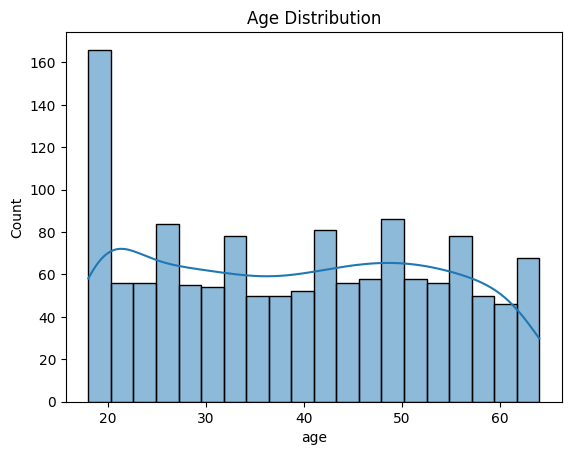

In [22]:
# Distribution plots using age
sns.histplot(df['age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()


## Age Distribution

The histogram above shows the distribution of ages in the dataset.  

- The ages range from **18 to 64 years**.  
- There is a noticeable spike at **age 18–20**, which means many younger individuals are represented.  
- After age 20, the distribution is fairly balanced across different age groups, with small increases around **ages 45–55**.  
- The average age is about **39 years**, which matches the median, suggesting the distribution is not heavily skewed.  

This tells us the dataset includes a wide range of adults, but it slightly overrepresents young adults compared to older populations.  


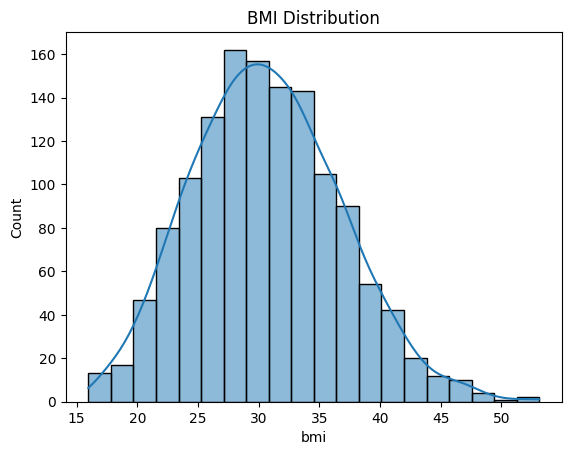

In [13]:
# Distribution plots using BMI
sns.histplot(df['bmi'], bins=20, kde=True)
plt.title("BMI Distribution")
plt.show()

## BMI Distribution

The histogram above shows the distribution of BMI (Body Mass Index) in the dataset.  

- BMI values range from about **16 to 53**.  
- The average BMI is around **30**, which falls into the **obese** category.  
- The distribution looks roughly **bell-shaped** (normally distributed) but slightly **right-skewed** (a few individuals have very high BMI values above 40).  
- Most people fall between **25 and 35**, which is in the overweight to obese range.  

This suggests that many individuals in the dataset are at a higher health risk based on BMI, which may influence their insurance charges.  


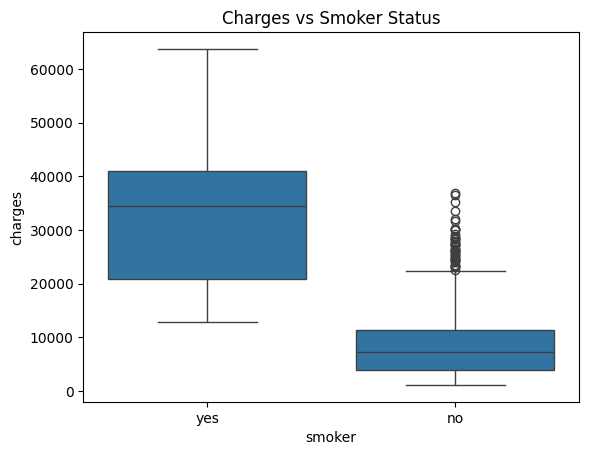

In [14]:
# Charges distribution
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Charges vs Smoker Status")
plt.show()

## Charges vs. Smoker Status

The boxplot above compares insurance charges between smokers and non-smokers.  

- **Smokers** have much higher charges, with a median above **$30,000**.  
- **Non-smokers** have a median closer to **$7,000–$8,000**.  
- The spread of charges for smokers is much wider, showing that costs vary a lot depending on individual health conditions.  
- There are also many **outliers** among non-smokers, but their charges are still lower compared to smokers.  

This shows that smoking is one of the strongest factors driving insurance costs in the dataset.  


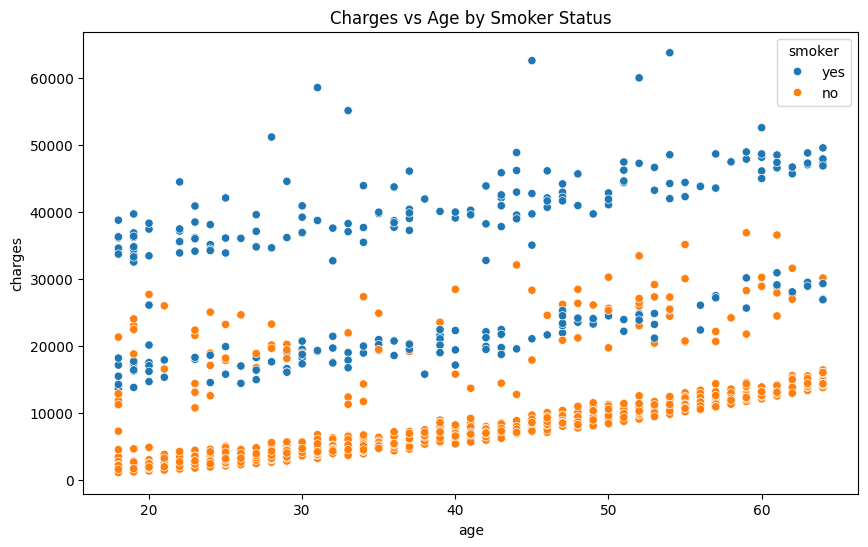

In [ ]:
# Visualize charges vs age 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', hue='smoker', data=df)
plt.title("Charges vs Age by Smoker Status")
plt.show()  

## Charges vs. Age by Smoker Status

The scatterplot above shows how insurance charges vary by age and smoker status.  

- **Smokers (blue points)** consistently have much higher charges than non-smokers at every age group.  
- For both smokers and non-smokers, charges tend to **increase with age**, which makes sense as older individuals usually face higher health risks.  
- The gap between smokers and non-smokers is very large, with smokers often paying **two to three times more** in charges.  
- There is also high variability among smokers, with some individuals incurring extremely high costs (above **$50,000**).  

This confirms that **age and smoking together** are two of the most important predictors of insurance charges in the dataset.  


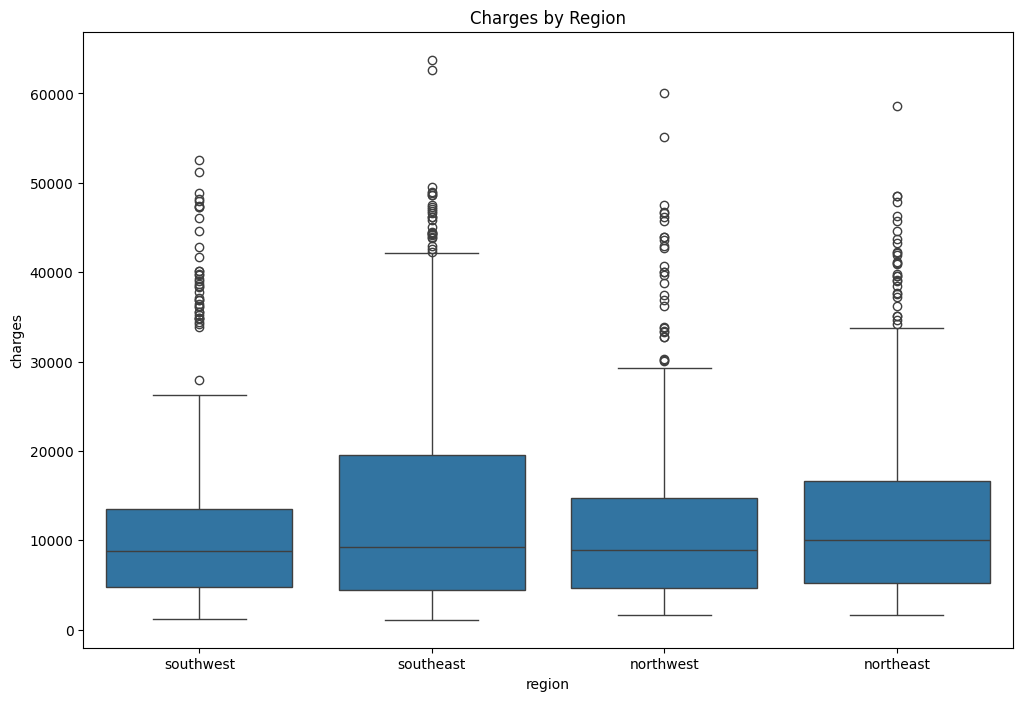

In [24]:
# visualize demographics vs charges
plt.figure(figsize=(12, 8))
sns.boxplot(x='region', y='charges', data=df)
plt.title("Charges by Region")
plt.show()

## Charges by Region

The boxplot above shows how insurance charges vary across the four regions (southwest, southeast, northwest, northeast).  

- The **median charges** are fairly similar across all regions, generally around **$9,000–$10,000**.  
- The **southeast region** shows a slightly higher spread in charges compared to other regions.  
- All regions have a large number of **outliers** (individuals with very high charges above $40,000).  
- Overall, region does not seem to be a strong predictor of charges compared to other factors like smoking status.  

This suggests that geographic location has only a small effect on insurance charges in this dataset.  


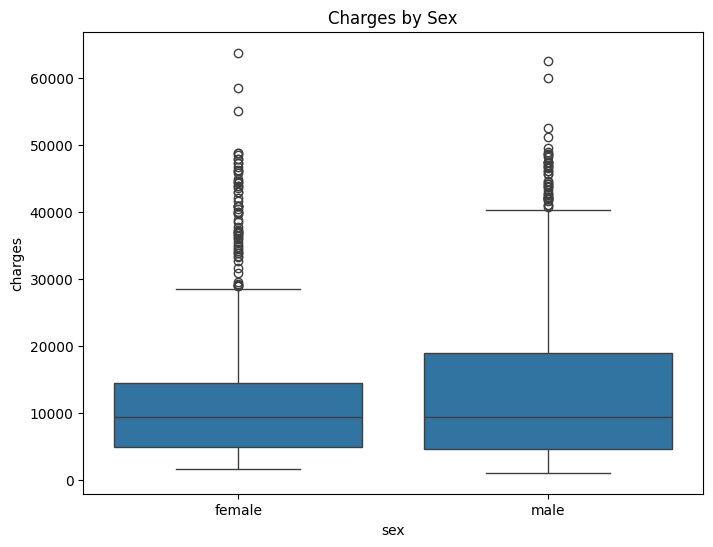

In [25]:
# visualize sex vs charges
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='charges', data=df)
plt.title("Charges by Sex")
plt.show()

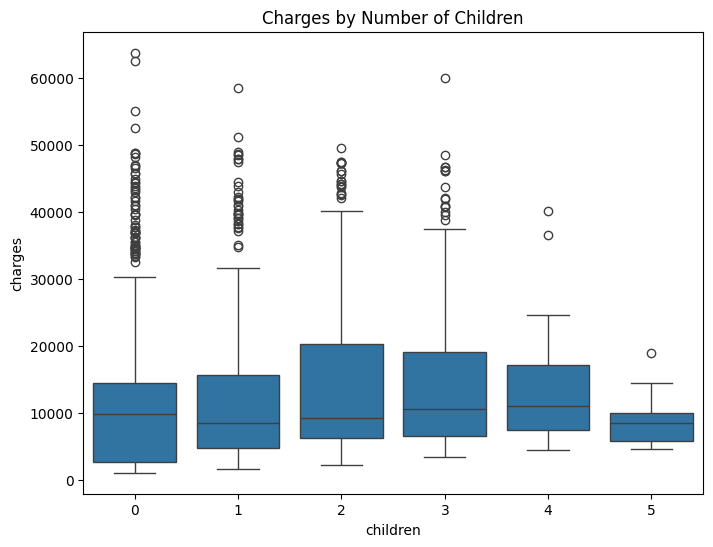

In [26]:
#visualize # of children vs charges
plt.figure(figsize=(8, 6))
sns.boxplot(x='children', y='charges', data=df)
plt.title("Charges by Number of Children")
plt.show()

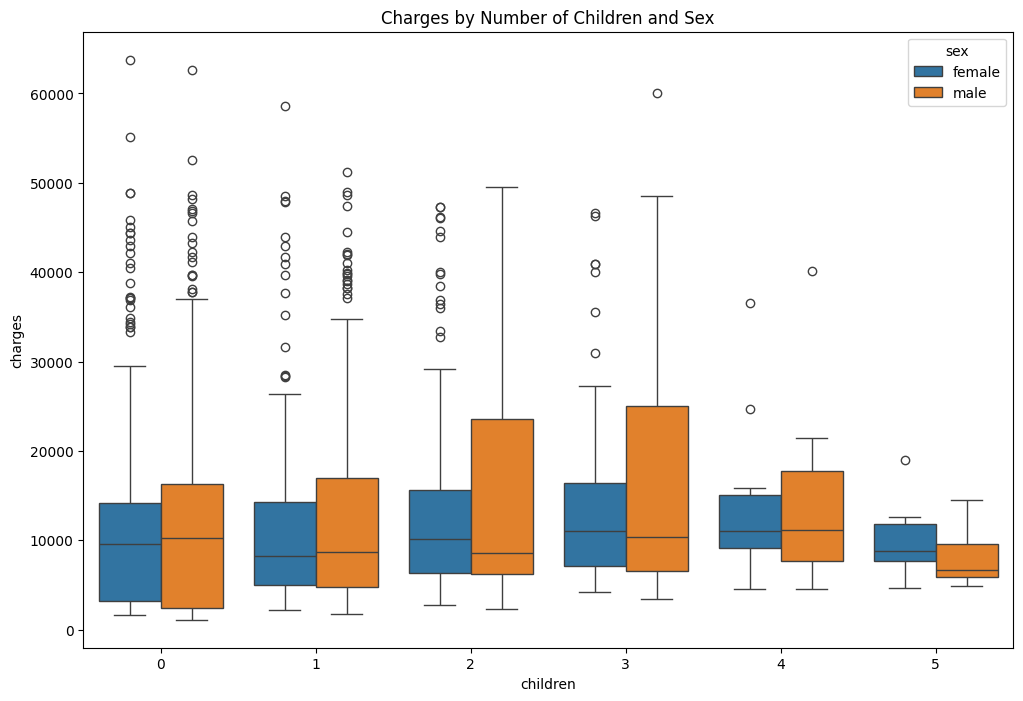

In [27]:
# visualize women vs men with # of children and charges
plt.figure(figsize=(12, 8))
sns.boxplot(x='children', y='charges', hue='sex', data=df)
plt.title("Charges by Number of Children and Sex")
plt.show()

### Charges by Number of Children and Sex

This boxplot shows how insurance charges vary by the number of children, separated by sex.  
For 0–3 children, the median charges generally increase or stay stable, and males often have slightly higher charges than females.  

After 3 children, the median charges appear to go down for both sexes. This drop is likely due to **small sample sizes** in the dataset for families with 4 or 5 children, making those groups less representative and more sensitive to outliers.  

**Key takeaway:** While charges seem higher for families with up to 3 children, the decline after that should not be over-interpreted since it may reflect dataset imbalance rather than a true trend.


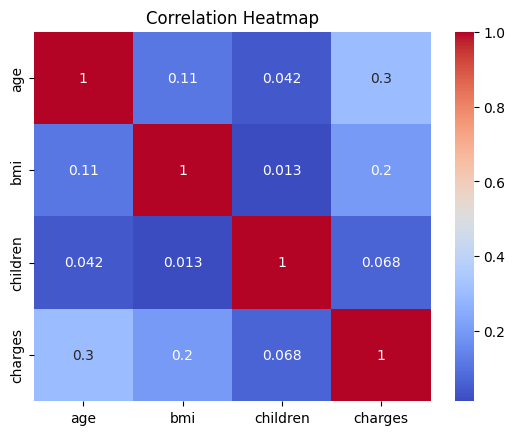

In [15]:
# Correlation heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [17]:
#  Preprocessing / Feature Engineering 
# Separate features and target
X = df.drop("charges", axis=1)
y = df["charges"]

# Categorical and numeric columns
categorical = ["sex", "smoker", "region"]
numeric = ["age", "bmi", "children"]

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric),
        ("cat", OneHotEncoder(drop="first"), categorical)
    ]
)


In [18]:
#  Modeling 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#  Evaluation 
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

# Important notes on ethical considerations
print("\nEthical Considerations:")
print("- Dataset may underrepresent certain regions or demographics.")
print("- Charges reflect systemic healthcare cost inequities.")
print("- Features like 'smoker' may reinforce stigma if misused.")
print("- Always consider fairness when applying models to policy or pricing.")

MAE: 4181.194473753653
R2: 0.7835929767120722

Ethical Considerations:
- Dataset may underrepresent certain regions or demographics.
- Charges reflect systemic healthcare cost inequities.
- Features like 'smoker' may reinforce stigma if misused.
- Always consider fairness when applying models to policy or pricing.
